In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import csv
import itertools
import collections

In [2]:
# txt랑 csv 100 ~ 234
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dataset\100.csv
dataset\100annotations.txt
dataset\101.csv
dataset\101annotations.txt
dataset\102.csv
dataset\102annotations.txt
dataset\103.csv
dataset\103annotations.txt
dataset\104.csv
dataset\104annotations.txt
dataset\105.csv
dataset\105annotations.txt
dataset\106.csv
dataset\106annotations.txt
dataset\107.csv
dataset\107annotations.txt
dataset\108.csv
dataset\108annotations.txt
dataset\109.csv
dataset\109annotations.txt
dataset\111.csv
dataset\111annotations.txt
dataset\112.csv
dataset\112annotations.txt
dataset\113.csv
dataset\113annotations.txt
dataset\114.csv
dataset\114annotations.txt
dataset\115.csv
dataset\115annotations.txt
dataset\116.csv
dataset\116annotations.txt
dataset\117.csv
dataset\117annotations.txt
dataset\118.csv
dataset\118annotations.txt
dataset\119.csv
dataset\119annotations.txt
dataset\121.csv
dataset\121annotations.txt
dataset\122.csv
dataset\122annotations.txt
dataset\123.csv
dataset\123annotations.txt
dataset\124.csv
dataset\124annotations.txt
dataset\200

In [3]:
plt.rcParams["figure.figsize"] = (30,6)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.color'] = 'b'
plt.rcParams['axes.grid'] = True 

In [4]:
path = 'dataset/'
filenames = next(os.walk(path))[2]

records = list() # csv 파일 목록
annotations = list()
filenames.sort()

In [5]:
# os.path.splitext : 파일명과 확장자 분리
for f in filenames:
    filename, file_extension = os.path.splitext(f)
    
    # csv확장자는 records에 저장
    if(file_extension == '.csv'):
        records.append(path + filename + file_extension)

    # txt확장자는 annotations에 저장
    else:
        annotations.append(path + filename + file_extension)

In [6]:
records

['dataset/100.csv',
 'dataset/101.csv',
 'dataset/102.csv',
 'dataset/103.csv',
 'dataset/104.csv',
 'dataset/105.csv',
 'dataset/106.csv',
 'dataset/107.csv',
 'dataset/108.csv',
 'dataset/109.csv',
 'dataset/111.csv',
 'dataset/112.csv',
 'dataset/113.csv',
 'dataset/114.csv',
 'dataset/115.csv',
 'dataset/116.csv',
 'dataset/117.csv',
 'dataset/118.csv',
 'dataset/119.csv',
 'dataset/121.csv',
 'dataset/122.csv',
 'dataset/123.csv',
 'dataset/124.csv',
 'dataset/200.csv',
 'dataset/201.csv',
 'dataset/202.csv',
 'dataset/203.csv',
 'dataset/205.csv',
 'dataset/207.csv',
 'dataset/208.csv',
 'dataset/209.csv',
 'dataset/210.csv',
 'dataset/212.csv',
 'dataset/213.csv',
 'dataset/214.csv',
 'dataset/215.csv',
 'dataset/217.csv',
 'dataset/219.csv',
 'dataset/220.csv',
 'dataset/221.csv',
 'dataset/222.csv',
 'dataset/223.csv',
 'dataset/228.csv',
 'dataset/230.csv',
 'dataset/231.csv',
 'dataset/232.csv',
 'dataset/233.csv',
 'dataset/234.csv']

In [8]:
with open(records[0], 'rt') as csvfile:
    signals = []
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    next(spamreader)
    for row in spamreader:
        signals.append(int(row[1]))
        
print(signals[:50])
print(len(signals))

[995, 995, 995, 995, 995, 995, 995, 995, 1000, 997, 995, 994, 992, 993, 992, 989, 988, 987, 990, 993, 989, 988, 986, 988, 993, 997, 993, 986, 983, 977, 979, 975, 974, 972, 969, 969, 969, 971, 973, 971, 969, 966, 966, 966, 966, 967, 965, 963, 967, 969]
650000


In [135]:
r = 0
times = [] # 시간 담아두기
periods = [] # 시작점 담기 (구간 확인위해)
classes = [] # 분류 담아두기

with open(records[r], 'rt') as csvfile:
    signals = []
    annote = []
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    next(spamreader) # 헤더 지우기
    for row in spamreader:
        signals.append(int(row[1]))

with open(annotations[r],'r') as txtfile:
    data = txtfile.readlines()
    first = data[1].split()
    times.append(first[0])
    periods.append(first[1])
    classes.append('/')
    for row in data[2:]:
        annote.append(row.split())
        times.append(row.split()[0])
        periods.append(row.split()[1])
        classes.append(row.split()[2])
        
print(annote[:5])
print(times[:5])
print(periods[:5])
print(classes[:5])

[['0:00.214', '77', 'N', '0', '0', '0'], ['0:01.028', '370', 'N', '0', '0', '0'], ['0:01.839', '662', 'N', '0', '0', '0'], ['0:02.628', '946', 'N', '0', '0', '0'], ['0:03.419', '1231', 'N', '0', '0', '0']]
['0:00.050', '0:00.214', '0:01.028', '0:01.839', '0:02.628']
['18', '77', '370', '662', '946']
['/', 'N', 'N', 'N', 'N']


In [36]:
samples = list(map(int, periods))
samples[:6] # 길이

[18, 77, 370, 662, 946, 1231]

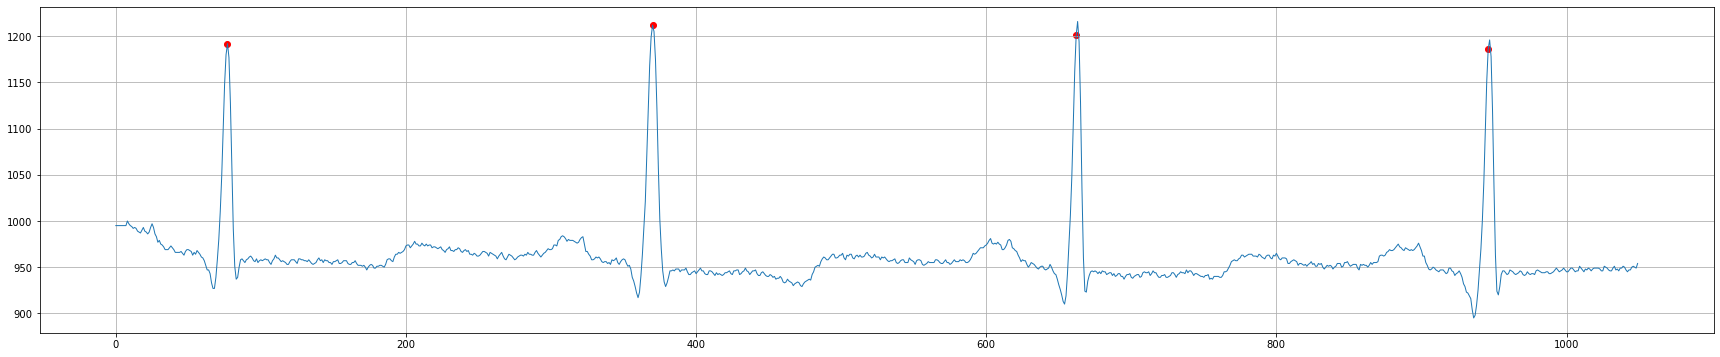

In [129]:
qspot = [] # q 점
rspot = [] # r 점
sspot = [] # s 점

plt.plot(signals[:1050])
# rspot = []
# for i in samples[:5]:
#     rspot.append(signals[i])
plt.scatter(samples[1:5], [signals[i] for i in samples[1:5]], c='r')
plt.show()

In [93]:
temp = samples[1:4] # R 위치 가지고 우선적으로 correlation구하기
window = []
for i in temp:
    window.append([i-30, i+30])
window

[[47, 107], [340, 400], [632, 692]]

In [100]:
for i in range(len(window)-1):
    array = np.corrcoef(signals[window[i][0]:window[i][1]], signals[window[i+1][0]:window[i+1][1]])
    print(array)

[[1.         0.97521667]
 [0.97521667 1.        ]]
[[1.         0.96604411]
 [0.96604411 1.        ]]


In [140]:
for i in range(len(window)-1):
    array = np.corrcoef(signals[window[i][0]:window[i][1]], signals[window[i+1][0]:window[i+1][1]])
    print(i+1,"번째 신호의 Corr1 : ",array[0][1])

1 번째 신호의 Corr1 :  0.97521666910301
2 번째 신호의 Corr1 :  0.9660441147874228


In [107]:
for i in range(len(window)-1):
    array = np.corrcoef(signals[window[i][0]:window[i][1]], signals[window[i+1][0]:window[i+1][1]])
    print(i+2,"번째 Corr2 : ",array[0][1])

2 번째 Corr2 :  0.97521666910301
3 번째 Corr2 :  0.9660441147874228


In [108]:
for idx, item in enumerate(classes[1:], start = 1): #8,A
    if item != 'N':
        print(idx, item)
        break;

8 A


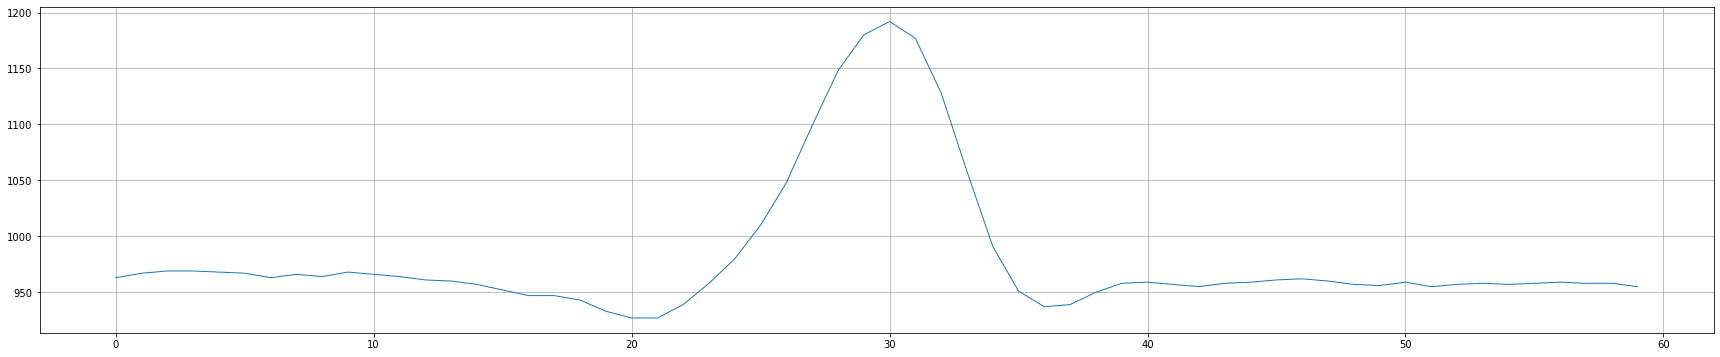

In [122]:
# 그냥 첫번째 N신호 가져옴
normal_signal = signals[samples[1]-30:samples[1]+30]
plt.plot(normal_signal)
plt.show()

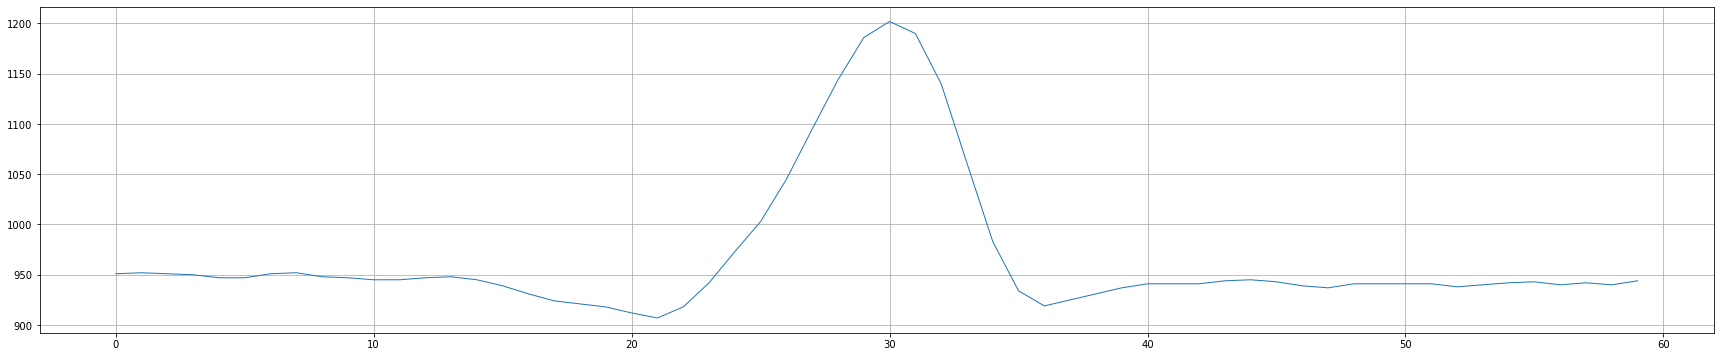

In [126]:
abnormal_signal = signals[samples[10]-30:samples[10]+30]
plt.plot(abnormal_signal)
plt.show()

N    2239
A      33
V       1
/       1
Name: 0, dtype: int64


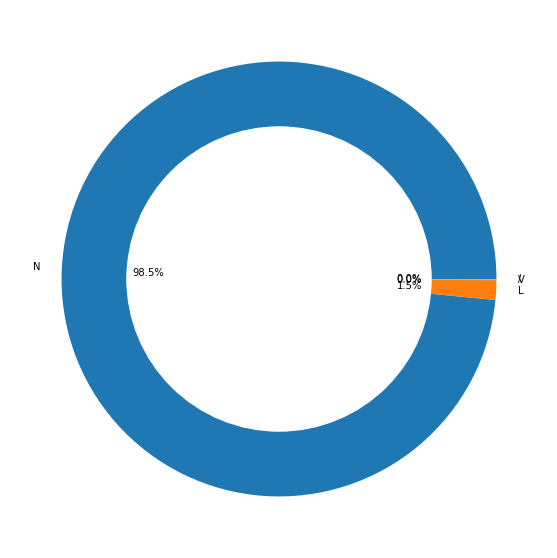

In [139]:
# representation of classes % wise
X_train_df = pd.DataFrame(classes)
# X_train_df
per_class = X_train_df[X_train_df.shape[1]-1].value_counts()
# per_class
print(per_class)
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['N', 'L', 'R', 'A', 'V', '/'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green','tab:red'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [127]:
arr = np.corrcoef(normal_signal, signals[samples[8]-30:samples[8]+30])
print(arr[0][1])

0.9848637652319113


In [ ]:
# Train Inputs
def get_train_inputs():
    x = tf.constant(X_train)
    y = tf.constant(y_train)
    return x, y

In [ ]:
# Test Inputs
def get_test_inputs():
    x = tf.constant(X_test)
    y = tf.constant(y_test)
    return x, y

In [ ]:
# Plot matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        #cm[i, j] = 0 if np.isnan(cm[i, j]) else cm[i, j]
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
# Eval data
def get_eval_data():
    return tf.constant(X_test)

In [ ]:
# Records
for r in range(0,len(records)):
# for r in range(2, 3):
    signals = []

    with open(records[r], 'rt') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|') # read CSV file\
        row_index = -1
        for row in spamreader:
            if(row_index >= 0):
                signals.insert(row_index, int(row[1]))
            row_index += 1
            
    if r == 0:
        with open(annotations[r],'r') as fileID:
            data = fileID.readlines()
#         next(data)
        print(data)
            splitted = data[0].split('    ')
            splitted = filter(None, splitted)
            print(splitted)
            splitted = filter(None, splitted)
            next(splitted)
            pos = int(next(splitted))
            arrhythmia_type = next(splitted)
        print(arrhythmia_type)
        Plot each patient's signal
        print(len(signals))
        plt.title(records[1] + " Wave")
        plt.plot(signals[:370])
        plt.show()

#     # Read anotations: R position and Arrhythmia class
#     with open(annotations[r], 'r') as fileID:
#         data = fileID.readlines() 
#         beat = list()

#         for d in range(1, len(data)): # 0 index is Chart Head
#             splitted = data[d].split(' ')
#             splitted = filter(None, splitted)
#             next(splitted) # Time... Clipping
#             pos = int(next(splitted)) # Sample ID
#             arrhythmia_type = next(splitted) # Type
#             if(arrhythmia_type in classes):
#                 arrhythmia_index = classes.index(arrhythmia_type)
#                 if count_classes[arrhythmia_index] > maximum_counting: # avoid overfitting
#                     pass
#                 else:
#                     count_classes[arrhythmia_index] += 1
#                     if(window_size < pos and pos < (len(signals) - window_size)):
#                         beat = signals[pos-window_size+1:pos+window_size]
#                         X.append(beat)
#                         y.append(arrhythmia_index)

In [ ]:
# Records
for r in range(0,len(records)):
# for r in range(2, 3):
    signals = []

    with open(records[r], 'rt') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|') # read CSV file\
        row_index = -1
        for row in spamreader:
            if(row_index >= 0):
                signals.insert(row_index, int(row[1]))
            row_index += 1
            
    if r is 1:
        # Plot each patient's signal
        plt.title(records[0] + " Wave")
        plt.plot(signals)
        plt.show()

#     # Read anotations: R position and Arrhythmia class
#     with open(annotations[r], 'r') as fileID:
#         data = fileID.readlines() 
#         beat = list()

#         for d in range(1, len(data)): # 0 index is Chart Head
#             splitted = data[d].split(' ')
#             splitted = filter(None, splitted)
#             next(splitted) # Time... Clipping
#             pos = int(next(splitted)) # Sample ID
#             arrhythmia_type = next(splitted) # Type
#             if(arrhythmia_type in classes):
#                 arrhythmia_index = classes.index(arrhythmia_type)
#                 if count_classes[arrhythmia_index] > maximum_counting: # avoid overfitting
#                     pass
#                 else:
#                     count_classes[arrhythmia_index] += 1
#                     if(window_size < pos and pos < (len(signals) - window_size)):
#                         beat = signals[pos-window_size+1:pos+window_size]
#                         X.append(beat)
#                         y.append(arrhythmia_index)

In [ ]:
y

In [ ]:
plt.plot(X[0])
print(y[0])

In [ ]:
for i in range(0,len(X)):
        X[i].append(y[i])

print(np.shape(X))

In [ ]:
plt.plot(X[1])

In [ ]:
plt.plot(X[2])

In [ ]:
plt.plot(X[3])

In [ ]:
plt.plot(X[4])